In [3]:
with open('tts.txt', 'r') as file:
    lines = file.readlines()

In [40]:
data = []
try:
    for line in lines:
        data.append(float(line.split()[4]))
except IndexError:
    pass



In [41]:
print(len(data))

1853


FDR = 9.675675675675675 %
Подогнанные параметры: Амплитуда=299.2873628831862, Среднее=-0.3510579720732504, Стандартное отклонение=0.8795189947190715


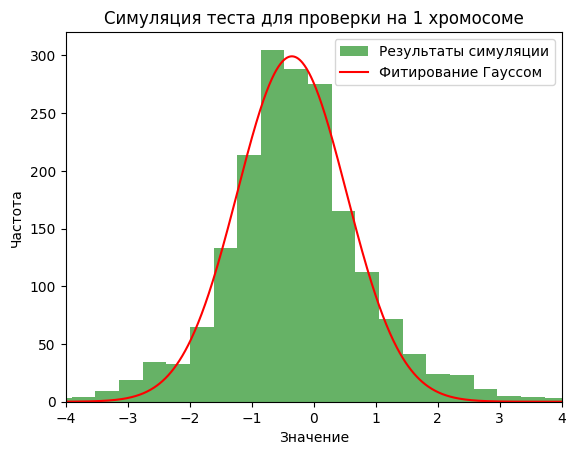

Коэффициент детерминации R^2: 0.9774366932072343


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import chisquare


i = 0
for d in data:
    if np.abs(d) > 1.96:
        i += 1
print(f'FDR = {i /1850 * 100} %')

# 1. Построим гистограмму данных (без нормализации!)
hist_data, bin_edges = np.histogram(data, bins=30)

# Рассчитаем центры бинов (для подгонки)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 2. Определим функцию для подгонки (Гауссову кривую)
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# 3. Выполним подгонку Гаусса к данным гистограммы
popt, _ = curve_fit(gaussian, bin_centers, hist_data, p0=[max(hist_data), np.mean(data), np.std(data)])

# Извлекаем параметры подогнанной функции
amplitude, mean, stddev = popt
print(f"Подогнанные параметры: Амплитуда={amplitude}, Среднее={mean}, Стандартное отклонение={stddev}")

# 4. Оценка качества подгонки: Хи-квадрат
expected = gaussian(bin_centers, *popt)

# Важно: сделаем так, чтобы суммы были одинаковыми
expected *= np.sum(hist_data) / np.sum(expected)

chi2, p_value = chisquare(hist_data, expected)
#print(f"Хи-квадрат: {chi2}, p-значение: {p_value}")

# 5. Визуализация: гистограмма и подогнанная кривая
plt.hist(data, bins=30, alpha=0.6, color='g', label='Результаты симуляции')
x_values = np.linspace(min(data), max(data), 1000)
plt.plot(x_values, gaussian(x_values, *popt), label='Фитирование Гауссом', color='r')
plt.legend()
plt.xlim(-4, 4)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Симуляция теста для проверки на 1 хромосоме')
plt.show()

# 6. Коэффициент детерминации R^2
ss_res = np.sum((hist_data - expected) ** 2)
ss_tot = np.sum((hist_data - np.mean(hist_data)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"Коэффициент детерминации R^2: {r_squared}")


In [3]:
filename = '24_09_24_17_19_17.txt'
with open(filename, 'r') as file:
    lines = file.readlines()

data = []
try:
    for line in lines[1:]:
        data.append(float(line))
except IndexError:
    pass
print(len(data))

2000


FDR = 8.972972972972974 %
Подогнанные параметры: Амплитуда=308.98076967701553, Среднее=-0.3721970536824759, Стандартное отклонение=0.9017417306482768


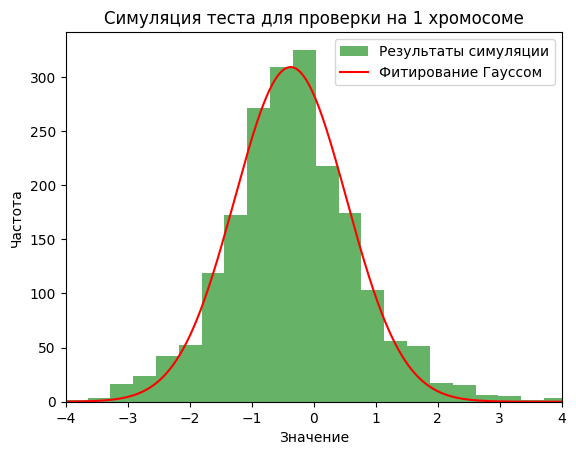

Коэффициент детерминации R^2: 0.9819635699841922


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import chisquare


i = 0
for d in data:
    if np.abs(d) > 1.96:
        i += 1
print(f'FDR = {i /1850 * 100} %')

# 1. Построим гистограмму данных (без нормализации!)
hist_data, bin_edges = np.histogram(data, bins=30)

# Рассчитаем центры бинов (для подгонки)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 2. Определим функцию для подгонки (Гауссову кривую)
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# 3. Выполним подгонку Гаусса к данным гистограммы
popt, _ = curve_fit(gaussian, bin_centers, hist_data, p0=[max(hist_data), np.mean(data), np.std(data)])

# Извлекаем параметры подогнанной функции
amplitude, mean, stddev = popt
print(f"Подогнанные параметры: Амплитуда={amplitude}, Среднее={mean}, Стандартное отклонение={stddev}")

# 4. Оценка качества подгонки: Хи-квадрат
expected = gaussian(bin_centers, *popt)

# Важно: сделаем так, чтобы суммы были одинаковыми
expected *= np.sum(hist_data) / np.sum(expected)

chi2, p_value = chisquare(hist_data, expected)
#print(f"Хи-квадрат: {chi2}, p-значение: {p_value}")

# 5. Визуализация: гистограмма и подогнанная кривая
plt.hist(data, bins=30, alpha=0.6, color='g', label='Результаты симуляции')
x_values = np.linspace(min(data), max(data), 1000)
plt.plot(x_values, gaussian(x_values, *popt), label='Фитирование Гауссом', color='r')
plt.legend()
plt.xlim(-4, 4)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Симуляция теста для проверки на 1 хромосоме')
plt.show()

# 6. Коэффициент детерминации R^2
ss_res = np.sum((hist_data - expected) ** 2)
ss_tot = np.sum((hist_data - np.mean(hist_data)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"Коэффициент детерминации R^2: {r_squared}")


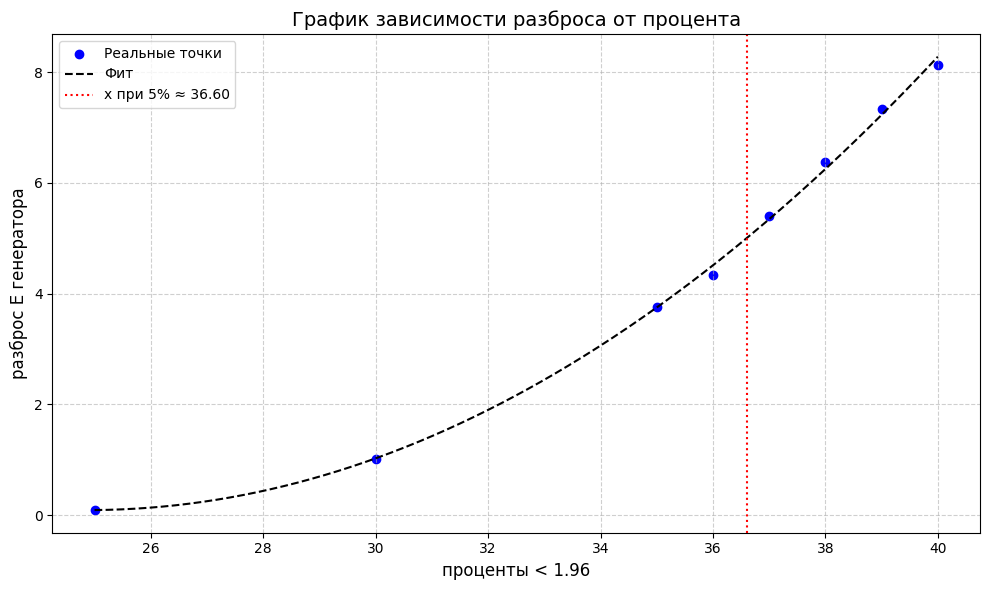

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy import interpolate

# Данные
x = np.array([25, 30, 35, 36, 37, 38, 39, 40])
y_raw = np.array([0.001, 0.0102, 0.0376, 0.0434, 0.0541, 0.0638, 0.0734, 0.0813])
y = y_raw * 100  # Переводим в проценты

# Функция для фита: например, экспонента + полином — подбираем по поведению
def fit_func(x, a, b, c, d):
    return a * np.exp(b * x) + c * x + d

# Фит
popt, _ = curve_fit(fit_func, x, y, maxfev=100000)

# Генерим плавную линию
x_fit = np.linspace(min(x), max(x), 500)
y_fit = fit_func(x_fit, *popt)

# Интерполяция, чтобы найти, при каком x, y = 5%
f_interp = interp1d(y_fit, x_fit, bounds_error=False, fill_value='extrapolate')
x_at_5_percent = f_interp(5)

# Построение графика
plt.figure(figsize=(10, 6))
plt.grid(True, linestyle='--', alpha=0.6)

# Точки
plt.scatter(x, y, color='blue', label='Реальные точки')

# Фит
plt.plot(x_fit, y_fit, 'k--', linewidth=1.5, label='Фит')

# Вертикальная линия при y=5%
if np.isfinite(x_at_5_percent):
    plt.axvline(x_at_5_percent, color='red', linestyle=':', label=f'x при 5% ≈ {x_at_5_percent:.2f}')

# Подписи
plt.xlabel("проценты < 1.96", fontsize=12)
plt.ylabel("разброс E генератора", fontsize=12)
plt.title("График зависимости разброса от процента", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()
